<a href="https://colab.research.google.com/github/Chaqmoqjon/Deep_Learning/blob/main/4_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai
import torch
import numpy as np

In [ ]:
from fastai.vision.all import *


In [ ]:
path = untar_data(URLs.CAMVID_TINY) #tortadi va ZIP dan chiqaradi
path.ls() #codes.txt da ranglar, images da rasmlar, labels da label

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/labels')]

In [ ]:
!ls '/root/.fastai/data/camvid_tiny/labels' #mana shu rasmlarni nomini oladi

0001TP_006750_P.png  0006R0_f03210_P.png  0016E5_07979_P.png	Seq05VD_f00990_P.png
0001TP_006840_P.png  0006R0_f03240_P.png  0016E5_07995_P.png	Seq05VD_f01080_P.png
0001TP_007500_P.png  0006R0_f03330_P.png  0016E5_07997_P.png	Seq05VD_f01260_P.png
0001TP_007860_P.png  0006R0_f03450_P.png  0016E5_08001_P.png	Seq05VD_f01320_P.png
0001TP_008070_P.png  0006R0_f03630_P.png  0016E5_08009_P.png	Seq05VD_f01440_P.png
0001TP_008160_P.png  0006R0_f03720_P.png  0016E5_08057_P.png	Seq05VD_f01830_P.png
0001TP_008400_P.png  0016E5_00720_P.png   0016E5_08085_P.png	Seq05VD_f01890_P.png
0001TP_008580_P.png  0016E5_00840_P.png   0016E5_08089_P.png	Seq05VD_f01950_P.png
0001TP_008670_P.png  0016E5_01260_P.png   0016E5_08093_P.png	Seq05VD_f02070_P.png
0001TP_008700_P.png  0016E5_01500_P.png   0016E5_08101_P.png	Seq05VD_f02370_P.png
0001TP_008760_P.png  0016E5_01920_P.png   0016E5_08125_P.png	Seq05VD_f02640_P.png
0001TP_008940_P.png  0016E5_02250_P.png   0016E5_08137_P.png	Seq05VD_f02880_P.png
0001TP_009000_P.

In [ ]:
#label getter funksiyasi. image ga mos labellar
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}' #har bir rasmni nomini o'qishni imkonini beradi

dls = SegmentationDataLoaders.from_label_func(path, bs= 8, fnames=get_image_files(path/'images'),
                                                                                  label_func=label_getter, codes=np.loadtxt(path/'codes.txt', dtype = str))


In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 188MB/s]


epoch,train_loss,valid_loss,time
0,3.112399,2.431075,00:02


epoch,train_loss,valid_loss,time
0,2.040480,1.820369,00:01
1,1.742742,1.340960,00:01
2,1.517233,1.098322,00:01
3,1.522466,1.271328,00:01
4,1.415400,1.092832,00:01
5,1.307201,0.957942,00:01
6,1.199681,0.892366,00:01
7,1.096743,0.827718,00:01
8,1.008554,0.813481,00:01
9,0.934973,0.808606,00:01


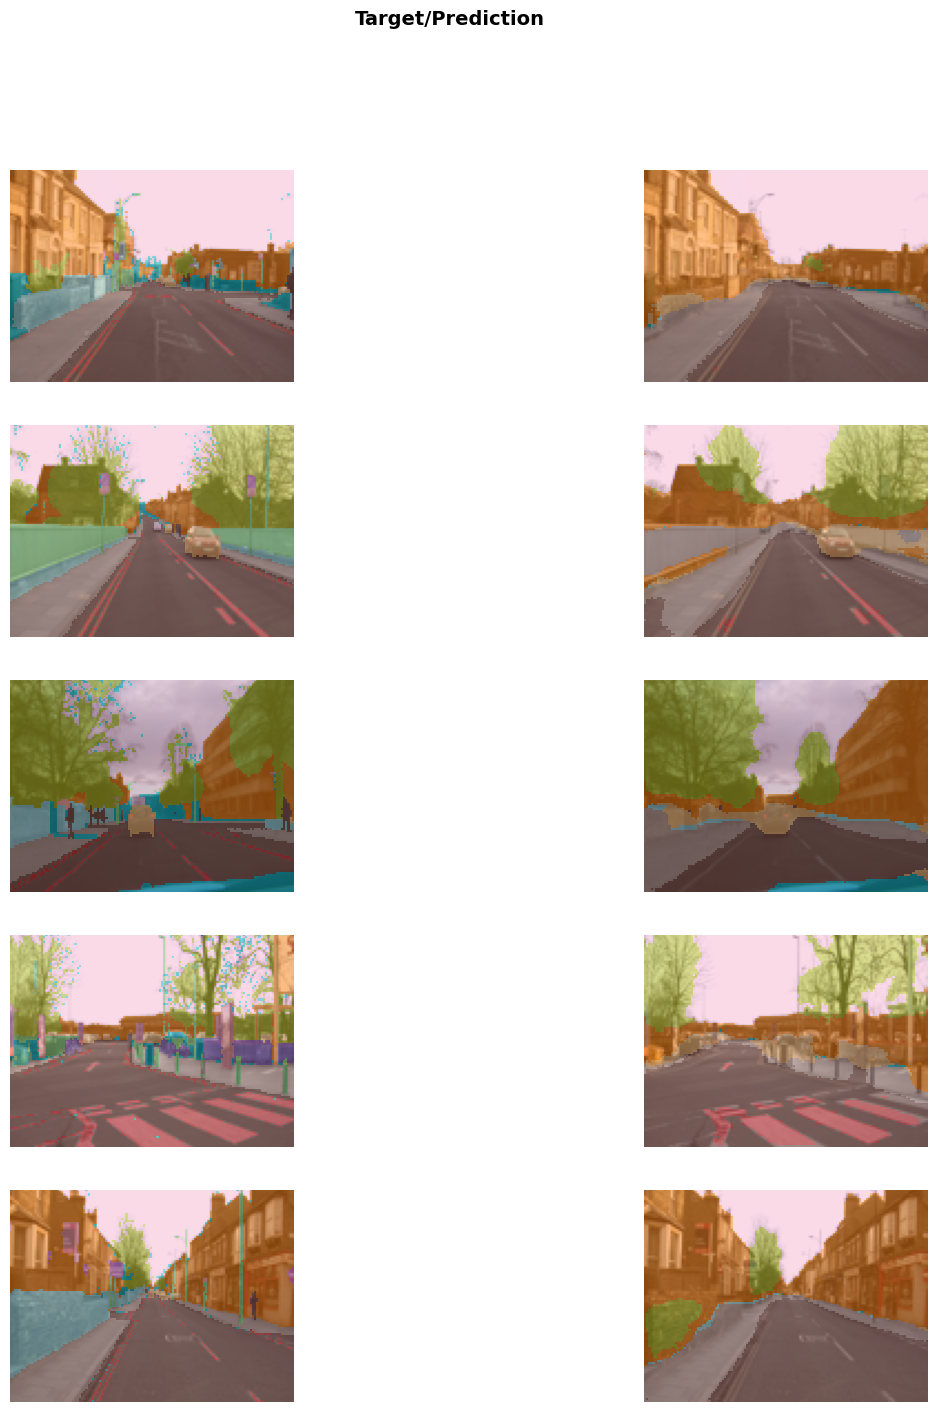

In [ ]:
learn.show_results(max_n = 5, figsize = (15, 16))